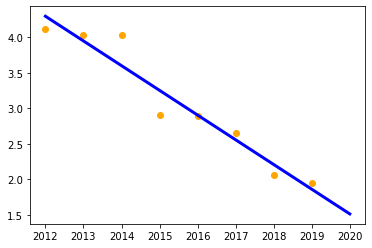

В 2020 году ожидается доля безработных инвалидов 1.52 %


In [2]:
'''Возьмите данные по безработице в городе Москва:
video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv
Сгруппируйте данные по годам, и, если в году меньше 6 значений, отбросьте эти годы.
Постройте модель линейной регрессии по годам среднего значения отношения UnemployedDisabled к UnemployedTotal
(процента людей с ограниченными возможностями) за месяц и ответьте,
какое ожидается значение процента безработных инвалидов в 2020 году при сохранении текущей политики города Москвы?
Ответ округлите до сотых. Например, 2,32'''

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
data = pd.read_csv('https://video.ittensive.com/python-advanced/data-9753-2019-07-25.utf.csv', delimiter=';')
data['sum'] = data.apply(lambda x: 100*x[6]/x[7], axis=1)
data = data.groupby('Year').filter(lambda x: x['Year'].count() >= 6)

data_avg = data.groupby('Year').mean()

x = np.array(data_avg.index).reshape(len(data_avg.index), 1)
y = np.array(data_avg['sum']).reshape(len(data_avg.index), 1)
model = LinearRegression()
model.fit(x, y)
plt.scatter(x, y, color='orange')
x = np.append(x, [2020]).reshape(len(data_avg.index)+1, 1)
plt.plot(x, model.predict(x), color='blue', linewidth=3)
plt.show()
print('В 2020 году ожидается доля безработных инвалидов', model.predict(np.array(2020).reshape(1, 1)).round(2)[0][0], '%')